# Importing Libraries

In [0]:
import glob
import os
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Importing/ Downloading  Dataset

## Using Kaggle
Use Only if you have Kaggle.json i.e Credentials provided by Kaggle to Download their Datset via API calls. 

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/" #path to the kaggle.json file in your drive, in my case it is on home directory

In [18]:
!kaggle datasets download -d disisbig/punjabi-wikipedia-articles

 73% 34.0M/46.3M [00:01<00:00, 14.1MB/s]
100% 46.3M/46.3M [00:01<00:00, 39.9MB/s]


In [0]:
!unzip /content/punjabi-wikipedia-articles.zip -d dataset_for_vocab

In [27]:
!kaggle datasets download -d disisbig/punjabi-news-dataset

  0% 0.00/1.64M [00:00<?, ?B/s]
100% 1.64M/1.64M [00:00<00:00, 96.4MB/s]


In [28]:
!unzip /content/punjabi-news-dataset.zip -d dataset_for_classification

Archive:  /content/punjabi-news-dataset.zip
  inflating: dataset_for_classification/train.csv  
  inflating: dataset_for_classification/valid.csv  


## Using manual Upload Option

[Link to Dataset for Building Vocabulary](https://www.kaggle.com/disisbig/punjabi-wikipedia-articles)

[Link to Datset for Classification](https://www.kaggle.com/disisbig/punjabi-news-dataset)

In [0]:
!unzip /content/punjabi-wikipedia-articles.zip -d dataset_for_vocab

In [0]:
!unzip /content/punjabi-news-dataset.zip -d dataset_for_classification

# Preprocessing Dataset to generate Language Model

In [0]:
filename_list = list()
for filename in glob.glob('dataset_for_vocab/*/*/*.txt'):
  file = os.path.join(os.getcwd(), filename)
  filename_list.append(file)

In [30]:
filename_list[:5]

['/content/dataset_for_vocab/train/train/15440.txt',
 '/content/dataset_for_vocab/train/train/9972.txt',
 '/content/dataset_for_vocab/train/train/2552.txt',
 '/content/dataset_for_vocab/train/train/32702.txt',
 '/content/dataset_for_vocab/train/train/193.txt']

In [31]:
filename_list[-5:]

['/content/dataset_for_vocab/valid/valid/44145.txt',
 '/content/dataset_for_vocab/valid/valid/6949.txt',
 '/content/dataset_for_vocab/valid/valid/22972.txt',
 '/content/dataset_for_vocab/valid/valid/11593.txt',
 '/content/dataset_for_vocab/valid/valid/5515.txt']

In [33]:
stopwords = [
  "ਦੇ", "0", "ਵਿੱਚ", "ਦਾ", "ਅਤੇ", "ਦੀ", "ਇੱਕ", "ਨੂੰ", "ਹੈ", "ਤੋਂ", "ਇਸ", "ਇਹ",
  "ਨੇ", "ਤੇ", "ਨਾਲ", "1", "ਲਈ", "ਵੀ", "ਸੀ", "ਵਿਚ", "ਕਿ", "ਜੋ", "ਉਹ", "ਉਸ",
  "ਹਨ", "ਜਾਂਦਾ", "ਕੀਤਾ", "2", "ਗਿਆ", "ਹੀ", "ਕੇ", "ਜਾਂ", "ਦੀਆਂ", "ਜਿਸ", "ਕਰਨ",
  "ਹੋ", "ਕਰ", "ਆਪਣੇ", "ਕੀਤੀ", "ਤੌਰ", "ਬਾਅਦ", "ਨਹੀਂ", "ਭਾਰਤੀ", "ਪਿੰਡ", "3",
  "ਸਿੰਘ", "ਉੱਤੇ", "ਸਾਲ", "।", "ਪੰਜਾਬ", "ਸਭ", "ਭਾਰਤ", "ਉਨ੍ਹਾਂ", "ਹੁੰਦਾ", "ਤੱਕ",
  "ਇਕ", "ਹੋਇਆ", "ਜਨਮ", "ਬਹੁਤ", "ਪਰ", "ਦੁਆਰਾ", "ਰੂਪ", "4", "ਹੋਰ", "ਕੰਮ", "ਆਪਣੀ",
  "ਤਾਂ", "ਸਮੇਂ", "ਪੰਜਾਬੀ", "ਗਈ", "ਦਿੱਤਾ", "ਦੋ", "ਕਿਸੇ", "ਕਈ", "ਜਾ", "ਵਾਲੇ",
  "ਸ਼ੁਰੂ", "5", "ਉਸਨੇ", "ਕਿਹਾ", "ਹੋਣ", "ਲੋਕ", "ਜਾਂਦੀ", "ਵਿੱਚੋਂ", "ਨਾਮ", "ਜਦੋਂ",
  "ਪਹਿਲਾਂ", "ਕਰਦਾ", "ਹੁੰਦੀ", "ਹੋਏ", "ਸਨ", "ਵਜੋਂ", "ਰਾਜ", "ਮੁੱਖ", "ਕਰਦੇ", "ਕੁਝ",
  "ਸਾਰੇ", "ਹੁੰਦੇ", "ਸ਼ਹਿਰ", "ਭਾਸ਼ਾ", "6", "ਹੋਈ", "ਅਨੁਸਾਰ", "ਸਕਦਾ", "ਆਮ", "ਵੱਖ",
  "ਕੋਈ", "ਵਾਰ", "ਗਏ", "ਖੇਤਰ", "ਜੀ", "ਕਾਰਨ", "ਕਰਕੇ", "ਜਿਵੇਂ", "ਜ਼ਿਲ੍ਹੇ",
  "ਲੋਕਾਂ", "ਚ", "ਸਾਹਿਤ", "ਸਦੀ", "ਬਾਰੇ", "ਜਾਂਦੇ", "ਵਾਲਾ", "ਜਾਣ", "ਪਹਿਲੀ",
  "ਪ੍ਰਾਪਤ", "ਰਿਹਾ", "ਵਾਲੀ", "ਨਾਂ", "ਦੌਰਾਨ", "ਤਰ੍ਹਾਂ", "7", "ਯੂਨੀਵਰਸਿਟੀ", "ਨਾ",
  "ਏ", "ਤਿੰਨ", "ਇਨ੍ਹਾਂ", "ਗੁਰੂ", "ਇਸਨੂੰ", "ਇਹਨਾਂ", "ਪਿਤਾ", "ਲਿਆ", "ਸ਼ਾਮਲ",
  "ਸ਼ਬਦ", "ਅੰਗਰੇਜ਼ੀ", "ਉਸਨੂੰ", "ਉਹਨਾਂ", "8", "ਸਥਿਤ", "ਫਿਰ", "ਜੀਵਨ", "ਸਕੂਲ",
  "ਹੁਣ", "ਦਿਨ", "ਕੀਤੇ", "ਆਦਿ", "ਵੱਧ", "ਲੈ", "ਘਰ", "ਵੱਲ", "ਦੇਸ਼", "ਵਲੋਂ", "ਬਣ",
  "ਵੀਂ", "ਫਿਲਮ", "ਉਮਰ", "ਬਲਾਕ", "ਰਹੇ", "10", "ਸਾਹਿਬ", "ਕਰਦੀ", "ਹਰ", "ਪੈਦਾ",
  "ਘੱਟ", "9", "ਲੇਖਕ", "ਹਿੱਸਾ", "ਫ਼ਿਲਮ", "ਮੌਤ", "ਜਿੱਥੇ", "ਵੱਡਾ", "ਵਿਖੇ", "ਆਪਣਾ",
  "ਪਹਿਲਾ", "ਵਰਤੋਂ", "ਆਪ", "ਕਰਨਾ", "ਵਿਆਹ", "ਰਹੀ", "ਰਾਹੀਂ", "ਦਿੱਤੀ", "ਉਸਦੇ",
  "ਪਰਿਵਾਰ", "ਆ", "ਦੂਜੇ", "ਅਮਰੀਕਾ", "ਮੰਨਿਆ", "ਇਸਦੇ", "ਈ", "ਕਾਲਜ", "ਸਰਕਾਰ",
  "ਇੱਥੇ", "ਪਾਕਿਸਤਾਨ", "ਸ਼ਾਮਿਲ", "ਵਿਗਿਆਨ", "ਉਸਦੀ", "ਪੇਸ਼", "ਕਿਉਂਕਿ", "ਪਹਿਲੇ",
  "ਧਰਮ", "ਮਸ਼ਹੂਰ", "ਅੰਦਰ", "ਵਿਚੋਂ", "ਜਿਨ੍ਹਾਂ", "ਜਾਣਿਆ", "ਪਾਣੀ", "ਇਲਾਵਾ", "ਅਰਥ",
  "ਚਾਰ", "ਪ੍ਰਸਿੱਧ", "ਨਾਵਲ", "ਵੱਡੇ", "ਵੱਲੋਂ", "ਕਹਾਣੀ", "ਵਿਸ਼ਵ", "ਮੂਲ", "ਅਮਰੀਕੀ",
  "ਸਥਾਨ", "ਇਤਿਹਾਸ", "ਕੁੱਝ", "ਵਿਕਾਸ", "ਉੱਤਰ", "ਸਿੱਖਿਆ", "ਹਿੰਦੀ", "ਪ੍ਰਮੁੱਖ",
  "ਰਚਨਾ", "ਬਣਾਇਆ", "ਵਿਸ਼ੇਸ਼", "ਡਾ", "ਉੱਪਰ", "ਪੱਛਮੀ", "ਦੇਣ", "ਇਸਦਾ", "ਸਕਦੇ",
  "ਰੱਖਿਆ", "ਕਵੀ", "ਦਿੱਲੀ", "ਵੱਡੀ", "ਭੂਮਿਕਾ", "ਸਮਾਜ", "ਕਾਵਿ", "ਕੀ", "ਕੋਲ", "ਦ",
  "ਗੱਲ", "ਸੰਸਾਰ", "ਭਾਗ", "ਆਈ", "ਦੱਖਣ", "ਅੱਜ", "ਸਿੱਖ", "ਕਹਿੰਦੇ", "ਸੰਗੀਤ",
  "ਕਿਲੋਮੀਟਰ", "ਜਿਹਨਾਂ", "ਸਭਾ", "ਜਿਸਦਾ", "ਜਨਵਰੀ", "ਕਵਿਤਾ", "ਮੈਂਬਰ", "ਲਿਖਿਆ",
  "ਮਾਂ", "ਕਲਾ", "ਪੰਜ", "ਥਾਂ", "ਹੇਠ", "ਜਿਆਦਾ", "ਵਰਤਿਆ", "ਮਾਰਚ", "ਡੀ", "ਅਕਤੂਬਰ",
  "ਤਕ", "ਨਾਟਕ", "ਬੀ", "ਖਾਸ", "ਇਸੇ", "ਆਧੁਨਿਕ", "ਅਗਸਤ", "ਤਿਆਰ", "ਮਾਤਾ", "ਬਣਾਉਣ",
  "ਨਵੰਬਰ", "ਵਿਅਕਤੀ", "ਦੱਖਣੀ", "ਦਸੰਬਰ", "ਆਫ", "ਗੀਤ", "ਗਿਣਤੀ", "ਕਾਲ", "ਖੋਜ",
  "ਸਾਲਾਂ", "ਪੂਰੀ", "ਸਮਾਂ", "ਜ਼ਿਆਦਾ", "ਇਸਦੀ", "ਸਕਦੀ", "ਵਿਚਕਾਰ", "ਰਾਜਧਾਨੀ",
  "ਉਸਦਾ", "ਜੁਲਾਈ", "ਜੂਨ", "ਅਧੀਨ", "ਸਥਾਪਨਾ", "ਸੇਵਾ", "ਭਾਵ", "ਵਰਗ", "ਛੋਟੇ",
  "ਦਿੰਦਾ", "ਸਮਾਜਿਕ", "ਹੁੰਦੀਆਂ", "ਟੀਮ", "ਔਰਤਾਂ", "ਅਕਸਰ", "ਪ੍ਰਕਾਸ਼ਿਤ", "ਉਰਦੂ",
  "ਰੰਗ", "ਪਾਰਟੀ", "ਬਣਾ", "ਪ੍ਰਭਾਵ", "ਸ਼ੁਰੂਆਤ", "ਲਗਭਗ", "ਮਈ", "ਸਿਰਫ", "ਨੇੜੇ",
  "ਜਿਸਨੂੰ", "ਹਾਲਾਂਕਿ", "ਦੂਰ", "ਸਤੰਬਰ", "ਕਿਤਾਬ", "ਕਦੇ", "ਉੱਤਰੀ", "ਪ੍ਰਕਾਰ",
  "ਇਸਨੇ", "ਪ੍ਰਦੇਸ਼", "ਅੱਗੇ", "ਸੰਯੁਕਤ", "ਪੜ੍ਹਾਈ", "ਵਧੇਰੇ", "ਨਾਲ਼", "ਮਨੁੱਖ",
  "ਬਾਕੀ", "ਪ੍ਰਧਾਨ", "ਦੂਜੀ", "ਕੁੱਲ", "ਆਫ਼", "ਅਧਿਐਨ", "ਰਾਸ਼ਟਰੀ", "ਪੁੱਤਰ",
  "ਅੰਤਰਰਾਸ਼ਟਰੀ", "ਧਰਤੀ", "ਕੇਂਦਰ", "ਦੇਸ਼ਾਂ", "ਮੱਧ", "ਜ਼ਿਲ੍ਹਾ", "ਸਾਰੀਆਂ", "ਪੱਧਰ",
  "ਹੋਵੇ", "ਜੇ", "ਭਾਈ", "ਰਹਿਣ", "ਪੁਰਸਕਾਰ", "ਸਭਿਆਚਾਰ", "ਪਤਾ", "ਪਾਸੇ", "ਨਵੇਂ",
  "ਕੰਪਨੀ", "ਬਾਹਰ", "ਵੇਲੇ", "ਸੰਨ", "ਪੂਰਬੀ", "ਵਿਚਾਰ", "ਕਾਰਜ", "ਪੀ", "ਮਹੱਤਵਪੂਰਨ",
  "ਦੁਨੀਆਂ", "ਧਾਰਮਿਕ", "ਮਨੁੱਖੀ", "ਸਮੂਹ", "ਅਜਿਹੇ", "ਲਾਲ", "ਦੂਜਾ", "ਭਰਾ", "ਸ੍ਰੀ",
  "ਅੰਤ", "ਜਾਂਦੀਆਂ", "ਸ਼ਾਹ", "ਰਹਿੰਦੇ", "ਮਹਾਨ", "ਚੀਨ", "ਮੀਟਰ", "ਵਰਗੇ", "ਨਾਲੋਂ",
  "ਹਾਸਲ", "ਕਿਸਮ", "ਅਜਿਹਾ", "ਬਣਿਆ", "ਭਰ", "ਛੱਡ", "ਲੈਣ", "ਹਿੱਸੇ", "ਟੀ", "ਲਿਖੇ",
  "ਮਿਲ", "ਮੌਜੂਦ", "ਦਿੱਤੇ", "ਵਾਸਤੇ", "ਵਾਲੀਆਂ", "ਵਧੀਆ", "ਰੂਸੀ", "ਜਾਰੀ", "ਸਰਕਾਰੀ",
  "ਡਿਗਰੀ", "ਪੱਛਮ", "ਲੜਾਈ", "ਭਾਸ਼ਾਵਾਂ", "ਰਾਜਾ", "ਜਲੰਧਰ", "ਹਿੰਦੂ", "ਔਰਤ", "ਜੰਗ",
  "ਬਾਬਾ", "ਬੱਚਿਆਂ", "ਮੰਤਰੀ", "ਪਟਿਆਲਾ", "ਵਾਂਗ", "ਆਉਣ", "ਭਾਵੇਂ", "ਕੇਵਲ", "ਐਸ",
  "ਪ੍ਰਾਚੀਨ", "ਰਹਿੰਦਾ", "ਬੋਲੀ", "ਅਵਾਰਡ", "ਨਗਰ", "ਖੇਡਾਂ", "ਫਿਲਮਾਂ", "ਬੱਚੇ",
  "ਕੌਰ", "ਤੋ", "ਪ੍ਰਤੀ", "ਕੁਆਂਟਮ", "ਅਬਾਦੀ", "ਪੁਸਤਕ", "ਐਮ", "ਰਾਮ", "ਖੇਤਰਾਂ",
  "ਫਰਵਰੀ", "ਕ੍ਰਿਕਟ", "ਪੈਂਦਾ", "ਇਤਿਹਾਸਕ", "ਲੱਗ", "ਬ੍ਰਿਟਿਸ਼", "ਆਇਆ", "ਮਿਲਦਾ"
]
print(len(stopwords))

463


In [0]:
sentences = list()
for filename in filename_list[:]:
    with open(filename, 'r') as file:
      sentence = file.read()
      for word in stopwords:
        token = " " + word +" "
        sentence.replace(token, " ")
        sentence.replace("  ", " ")
      sentences.append(sentence)

In [39]:
print(len(sentences))

44547


# Configuration for Language Model

In [0]:
vocab_size = 10000
embedding_dim = 100
max_length = 1000 
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

# Building a Punjabi Vocabulary 

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [42]:
print(len(word_index))

260134


In [46]:
list(word_index.items())[:10]

[('<OOV>', 1),
 ('ਦੇ', 2),
 ('ਵਿੱਚ', 3),
 ('ਦੀ', 4),
 ('ਅਤੇ', 5),
 ('ਹੈ।', 6),
 ('ਹੈ', 7),
 ('ਦਾ', 8),
 ('ਨੂੰ', 9),
 ('ਇੱਕ', 10)]

# Preprocessing Dataset for Classification task 

In [0]:
train_sentences = list()
train_labels = list ()
with open("dataset_for_classification/train.csv", 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter = ',')
  next(reader)
  for row in reader:
    label = row[1]
    train_labels.append(label)
    sentence = row[0]
    for word in stopwords:
      token = " " + word +" "
      sentence.replace(token, " ")
      sentence.replace("  ", " ")
    train_sentences.append(sentence)

In [0]:
val_sentences = list()
val_labels = list ()
with open("dataset_for_classification/valid.csv", 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter = ',')
  next(reader)
  for row in reader:
    label = row[1]
    val_labels.append(label)
    sentence = row[0]
    for word in stopwords:
      token = " " + word +" "
      sentence.replace(token, " ")
      sentence.replace("  ", " ")
    val_sentences.append(sentence)

In [73]:
print(len(train_sentences))
print(len(train_labels))
print(len(val_sentences))
print(len(val_labels))

627
627
157
157


# Tokenizing dataset for Classification

In [0]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding = padding_type, maxlen=max_length)

In [0]:
validation_sequences = tokenizer.texts_to_sequences(val_sentences)
validation_padded = pad_sequences(validation_sequences, padding = padding_type, maxlen= max_length)

In [81]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

1454
1000
945
1000


In [82]:
print(len(validation_sequences))
print(validation_padded.shape)

157
(157, 1000)


In [84]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(train_labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(val_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[2]
[1]
[1]
(627, 1)
[1]
[2]
[2]
(157, 1)


# Training a Neural netwrok to Classify and simultaneiously Training for Embeddings

In [99]:
model = tf.keras.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 1000, 100)         1000000   
_________________________________________________________________
global_average_pooling1d_5 ( (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 774       
Total params: 1,015,558
Trainable params: 1,015,558
Non-trainable params: 0
_________________________________________________________________


In [102]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2) # YOUR CODE HERE)

Epoch 1/10
20/20 - 0s - loss: 0.0032 - accuracy: 0.9984 - val_loss: 1.0112 - val_accuracy: 0.8726
Epoch 2/10
20/20 - 0s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.9914 - val_accuracy: 0.8662
Epoch 3/10
20/20 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.9999 - val_accuracy: 0.8662
Epoch 4/10
20/20 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.0401 - val_accuracy: 0.8726
Epoch 5/10
20/20 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.9971 - val_accuracy: 0.8662
Epoch 6/10
20/20 - 0s - loss: 0.0044 - accuracy: 0.9984 - val_loss: 1.0494 - val_accuracy: 0.8726
Epoch 7/10
20/20 - 0s - loss: 0.0061 - accuracy: 0.9984 - val_loss: 1.1075 - val_accuracy: 0.8726
Epoch 8/10
20/20 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.0665 - val_accuracy: 0.8726
Epoch 9/10
20/20 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.1055 - val_accuracy: 0.8790
Epoch 10/10
20/20 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.0599 - val_accuracy: 0.8726


# Visualizing Training Process

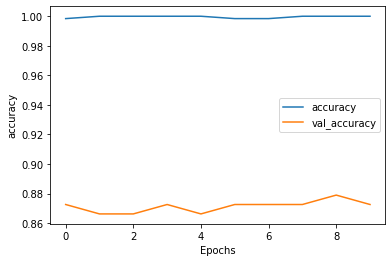

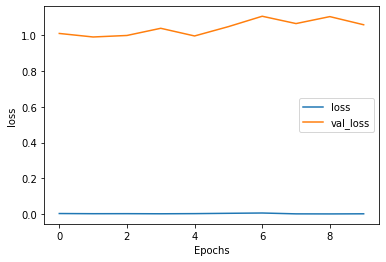

In [103]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


# Saving Embeddings into Files 
meta.tsv: Contains words
vecs.tsv: Contains Word Embeddings of Dimension 100

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [105]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 100)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

# Visualizing words in 3D space

**Once the file is downloaded on your System you can visualize by going to the [this website](https://projector.tensorflow.org/)**

Follow the following Steps:
1. ![Select Load](https://prnt.sc/sas10w) https://prnt.sc/sas10w
2. ![Upload Files](https://prnt.sc/sas2ko) https://prnt.sc/sas2ko
3. ![Select Words](https://prnt.sc/sas4mj) https://prnt.sc/sas4mj
4. Once you select the word, copy it and use [Google Translate](https://translate.google.com/) to view the word in English.

# References
Coursera NLP Course in Tensorflow in Practice Specialization.